In [1]:
import findspark
findspark.init()

import pyspark # only run after findspark.init()
from pyspark import SparkConf, SparkContext
conf = SparkConf().setAppName('datamining').setMaster('local')
sc = SparkContext(conf=conf)
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
#andere imports
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import pyspark.sql.functions as func
from pyspark.sql.functions import desc

In [2]:
movie = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('movies/movie.csv')
users = sqlContext.read.format('com.databricks.spark.csv').options(sep=";", header='true', inferschema='true').load('users/users.csv')
ratings_m = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('movies/rating.csv')
tags = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('movies/tag.csv')
books = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('books/books.csv')
ratings = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('books/ratings.csv')
book_tags = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('books/book_tags.csv')
tags_b = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('books/tags.csv')
to_read = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('books/to_read.csv')

In [3]:
display(HTML('<h1>De film dataset</h1>'))
movie.toPandas().head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings_m.show() # om te laten zien dat toPandas().head() iets mooier oogt.

+------+-------+------+-------------------+
|userId|movieId|rating|          timestamp|
+------+-------+------+-------------------+
|     1|      2|   3.5|2005-04-02 23:53:47|
|     1|     29|   3.5|2005-04-02 23:31:16|
|     1|     32|   3.5|2005-04-02 23:33:39|
|     1|     47|   3.5|2005-04-02 23:32:07|
|     1|     50|   3.5|2005-04-02 23:29:40|
|     1|    112|   3.5|2004-09-10 03:09:00|
|     1|    151|   4.0|2004-09-10 03:08:54|
|     1|    223|   4.0|2005-04-02 23:46:13|
|     1|    253|   4.0|2005-04-02 23:35:40|
|     1|    260|   4.0|2005-04-02 23:33:46|
|     1|    293|   4.0|2005-04-02 23:31:43|
|     1|    296|   4.0|2005-04-02 23:32:47|
|     1|    318|   4.0|2005-04-02 23:33:18|
|     1|    337|   3.5|2004-09-10 03:08:29|
|     1|    367|   3.5|2005-04-02 23:53:00|
|     1|    541|   4.0|2005-04-02 23:30:03|
|     1|    589|   3.5|2005-04-02 23:45:57|
|     1|    593|   3.5|2005-04-02 23:31:01|
|     1|    653|   3.0|2004-09-10 03:08:11|
|     1|    919|   3.5|2004-09-1

In [6]:
tags.toPandas().head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [68]:
display(HTML('<h1>De gebruikers dataset</h1>'))
users.toPandas().head()

,UserID,Gender,Age,Occupation,ZipCode
0,1,F,Under18,K-12student,48067
1,2,M,56+,self-employed,70072
2,3,M,25-34,scientist,55117
3,4,M,45-49,executive/managerial,2460
4,5,M,25-34,writer,55455


In [8]:
display(HTML('<h1>De boek dataset</h1>'))

In [9]:
books.toPandas().head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715.0,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504.0,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191.0,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427.0,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236.0,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [10]:
book_tags.toPandas().head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [11]:
tags_b.toPandas().head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [12]:
to_read.toPandas().head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [13]:
display(HTML('<h1>Rating data</h1>'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ABDE3E99B0>]],
      dtype=object)

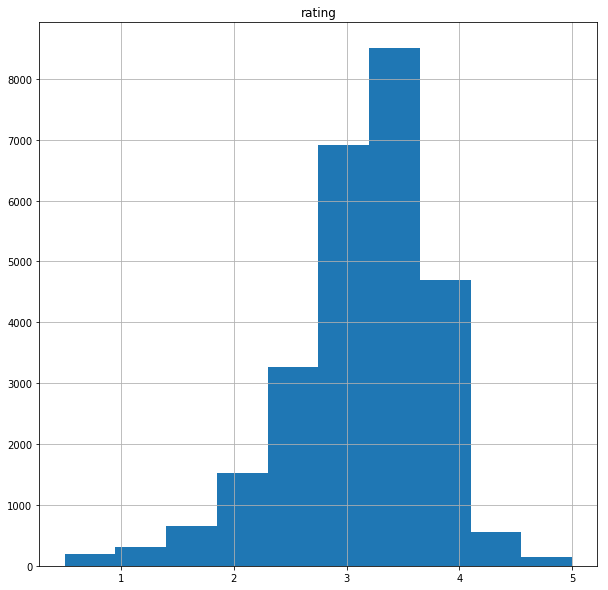

In [14]:
#aantal ratings per rating
display(HTML('<h2>Frequentie van ratings'))
movie_with_rating = ratings_m.select('movieId','rating')
avgratingpermovie = movie_with_rating.groupBy('movieId').agg({"rating": "mean"})
avgratingpermovie = avgratingpermovie.withColumnRenamed("avg(rating)", "rating")
pandas_df = avgratingpermovie.toPandas()
pandas_df.hist(column='rating', figsize=(10,10))

In [15]:

display(HTML('<h1>Movie data</h1>'))

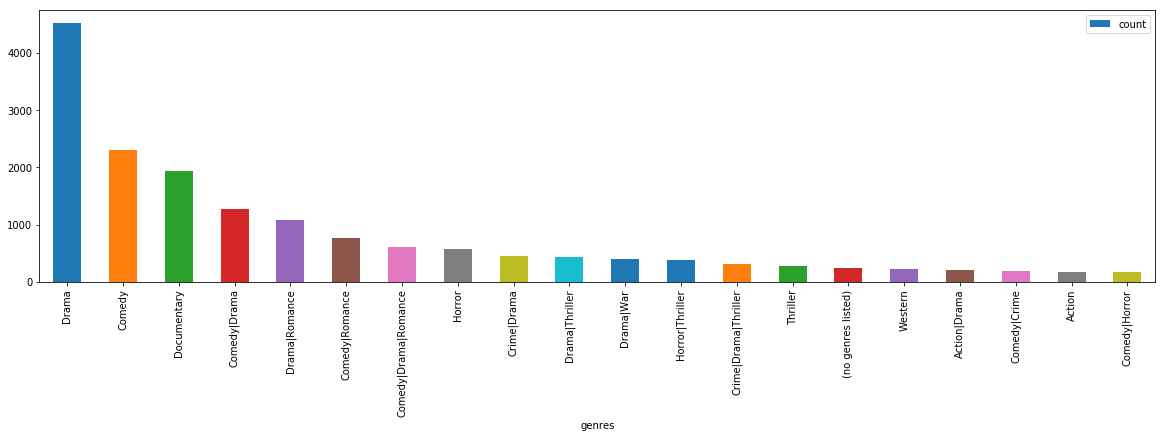

In [16]:
#meest gebruikt genres
display(HTML('<h2>Meest voorkomende genres</h2>'))
movies_p = movie.groupBy('genres').count().sort(desc("count")).toPandas()
movies_p[:20].plot(x='genres', y='count', kind='bar', figsize=(20,5))

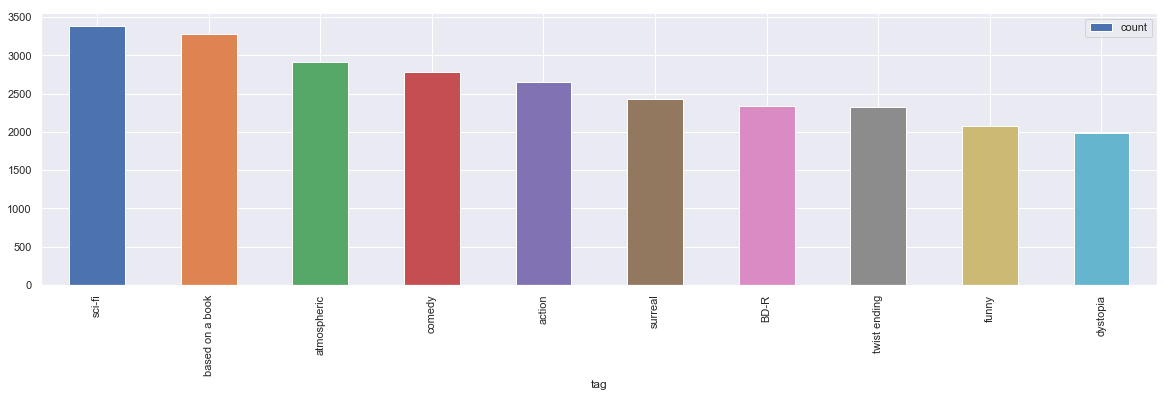

In [34]:
#meest gebruikte tags bij films
display(HTML('<h2>Meest gebruikte tags bij films</h2>'))
tags_p = tags.groupBy('tag').count().sort(desc("count")).toPandas()
tags_p[:10].plot(x='tag', y='count', kind='bar', figsize=(20,5))

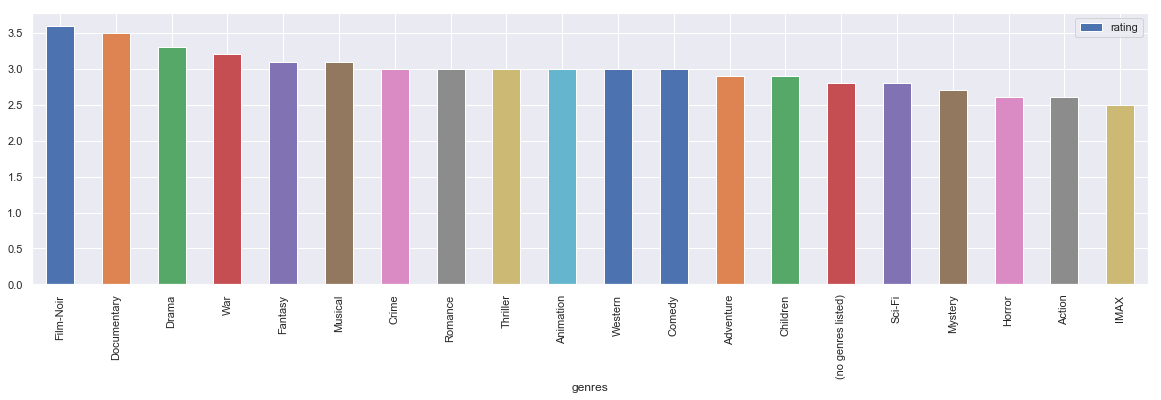

In [71]:
#avg rating per genre
display(HTML('<h2>Gemiddelde rating per genre</h2>'))
movie_with_genre = movie.select('movieId', 'genres')
movie_with_rating = ratings_m.select('movieId','rating')
avg_rating_per_movie = movie_with_rating.groupBy('movieId').agg({"rating": "mean"})
avg_rating_per_movie = avg_rating_per_movie.withColumnRenamed("avg(rating)", "rating")
rating_per_genre = movie_with_genre.join(avg_rating_per_movie, movie_with_genre.movieId == avg_rating_per_movie.movieId, 'inner').select(movie_with_genre.genres, avg_rating_per_movie.rating)
genre_rating = rating_per_genre.groupBy('genres').agg({"rating": "mean"})
genre_rating = genre_rating.withColumnRenamed("avg(rating)", "rating")
genre_rating = genre_rating.withColumn("rating", func.round(genre_rating["rating"],1))
sortedyears = genre_rating.orderBy(genre_rating.rating.desc())
genre_rating.createOrReplaceTempView("genre_rating");
genre_rating = sqlContext.sql("select * from genre_rating where genres not like '%|%'") #om het wat korter te maken want anders wordt de grafiek te groot
genre_rating =  genre_rating.orderBy(genre_rating.rating.desc())
pdf = genre_rating.toPandas()
pdf[:20].plot(x='genres', y='rating', kind='bar', figsize=(20,5))
plt.show()

<Figure size 432x288 with 0 Axes>

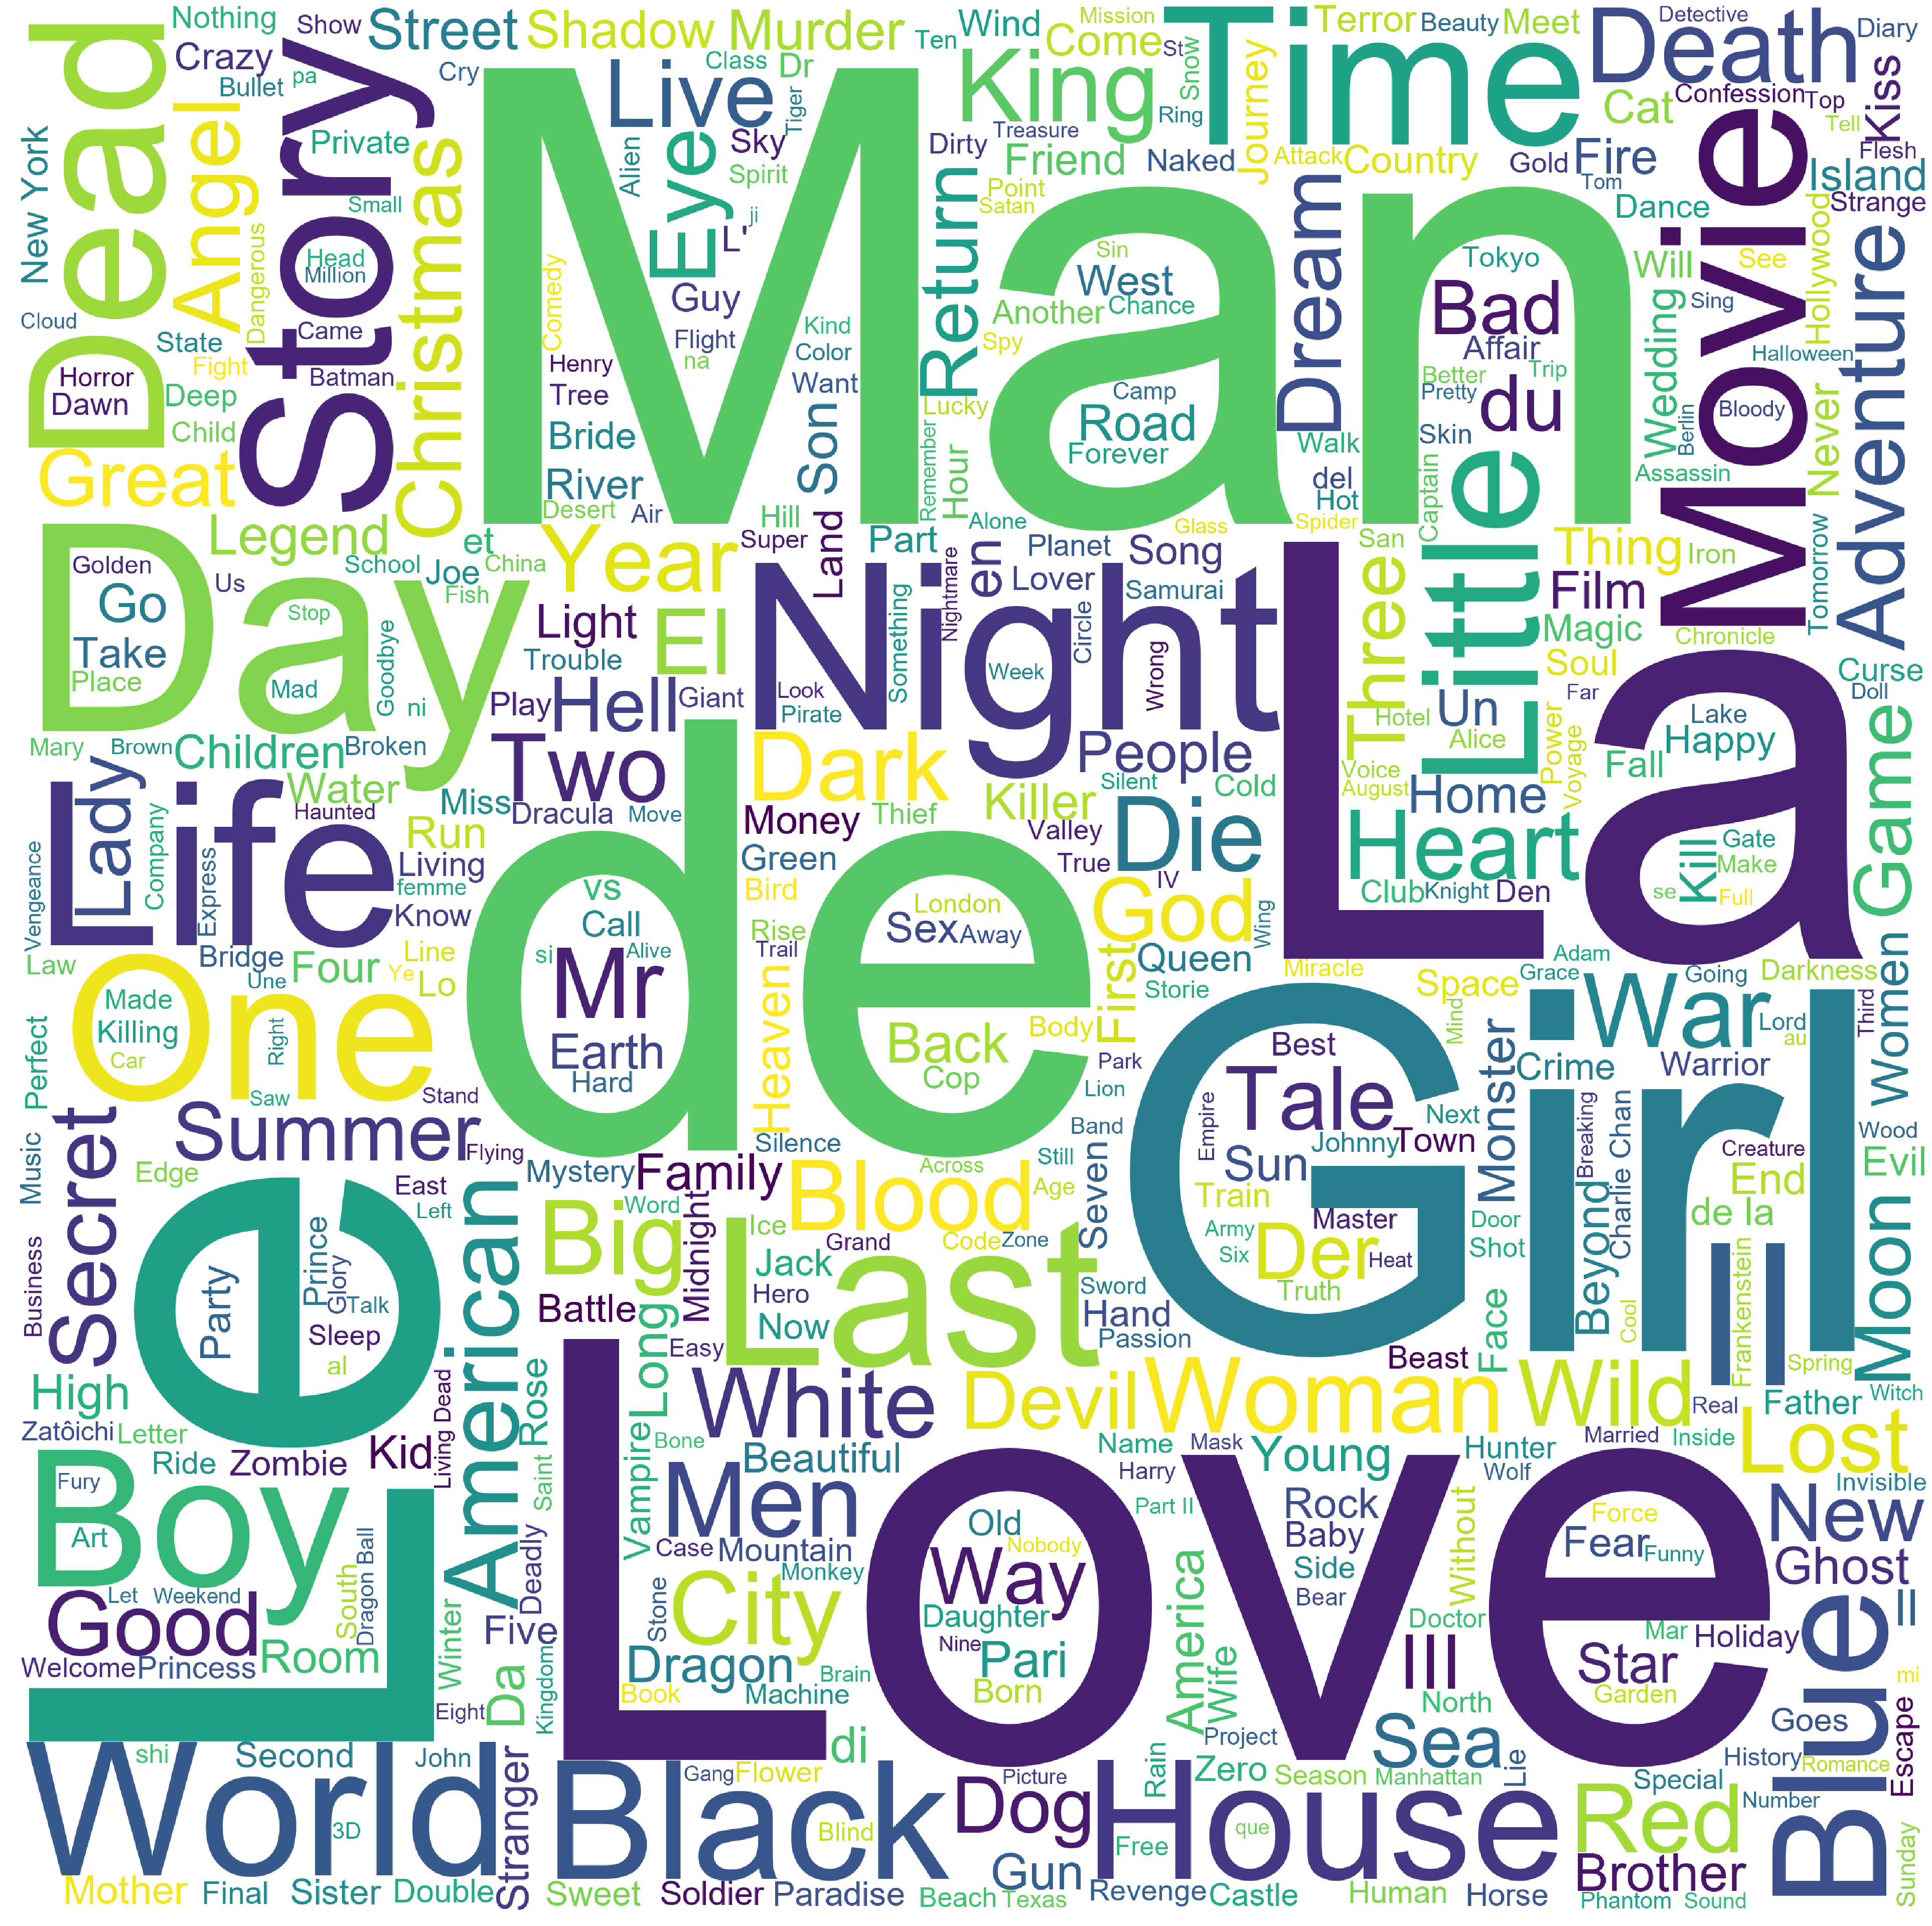

In [19]:
#Meest populaire woorden in films
display(HTML('<h2>Meest gebruikte woorden in titels</h2>'))
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
movie.createOrReplaceTempView("movie"); #werkt anders niet
movie_title_words = sqlContext.sql("select title from movie")
stopwords = set(STOPWORDS)
woorden = []
for value in movie_title_words.collect():
    for word in value:
        woorden.append(word)
    
wordcloud = WordCloud(width=3000, height=3000,font_path ='C:/windows/Fonts/Arial.ttf',
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=1000, 
                          random_state=42
                         ).generate(str(woorden))
fig = plt.figure(2)
plt.figure(figsize=(230,70) )
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [20]:
display(HTML('<h1>User data</h1>'))

In [21]:
#users met de meeste rating
display(HTML('<h2>Users met de meeste stemmen</h2>'))
ratings_per_user = ratings_m.groupby("userId").count().sort(desc("count"))
ratings_per_user.show()

+------+-----+
|userId|count|
+------+-----+
|118205| 9254|
|  8405| 7515|
| 82418| 5646|
|121535| 5520|
|125794| 5491|
| 74142| 5447|
| 34576| 5356|
|131904| 5330|
| 83090| 5169|
| 59477| 4988|
|130767| 4785|
| 79159| 4707|
|  8963| 4524|
| 15617| 4354|
| 92011| 4236|
| 71975| 4182|
| 20132| 4101|
| 46470| 4094|
| 88820| 4093|
| 63147| 3958|
+------+-----+
only showing top 20 rows



In [22]:
display(HTML('<h2>Accounts per geslacht</h2>'))
users_by_gender = users.groupby('gender').count()
users_by_gender.show()

+------+-----+
|gender|count|
+------+-----+
|     F| 1852|
|     M| 4188|
+------+-----+



In [23]:
display(HTML('<h2>Stemmen per geslacht</h2>'))
votes = ratings_m.join(users, ["userId"])
votes_by_gender = votes.groupby('gender').count()
votes_by_gender.show()

+------+------+
|gender| count|
+------+------+
|     F|273351|
|     M|627897|
+------+------+



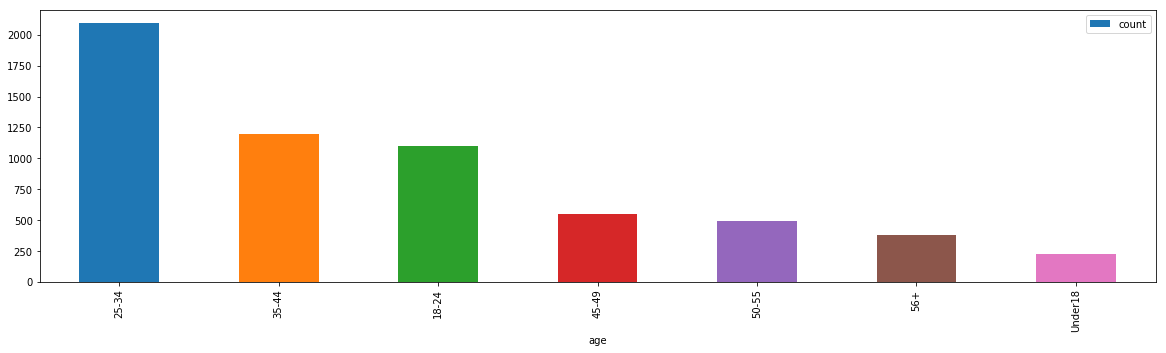

In [24]:
display(HTML('<h2>Leeftijds indeling</h2>'))
age_per_vote = users.groupby("age").count().sort(desc("count"))
age_per_vote.toPandas().plot(x='age', y='count', kind='bar', figsize=(20,5))


In [25]:
display(HTML('<h2>Stemverschil bij geslacht</h2>'))
votes_dif = ratings_m.join(users, ["userId"])
votes_dif = votes_dif.drop('timestamp')
test = votes.groupBy('Gender').agg({"rating": "mean"})
test.show()

+------+-----------------+
|Gender|      avg(rating)|
+------+-----------------+
|     F|3.526279399014454|
|     M|3.524534278711317|
+------+-----------------+



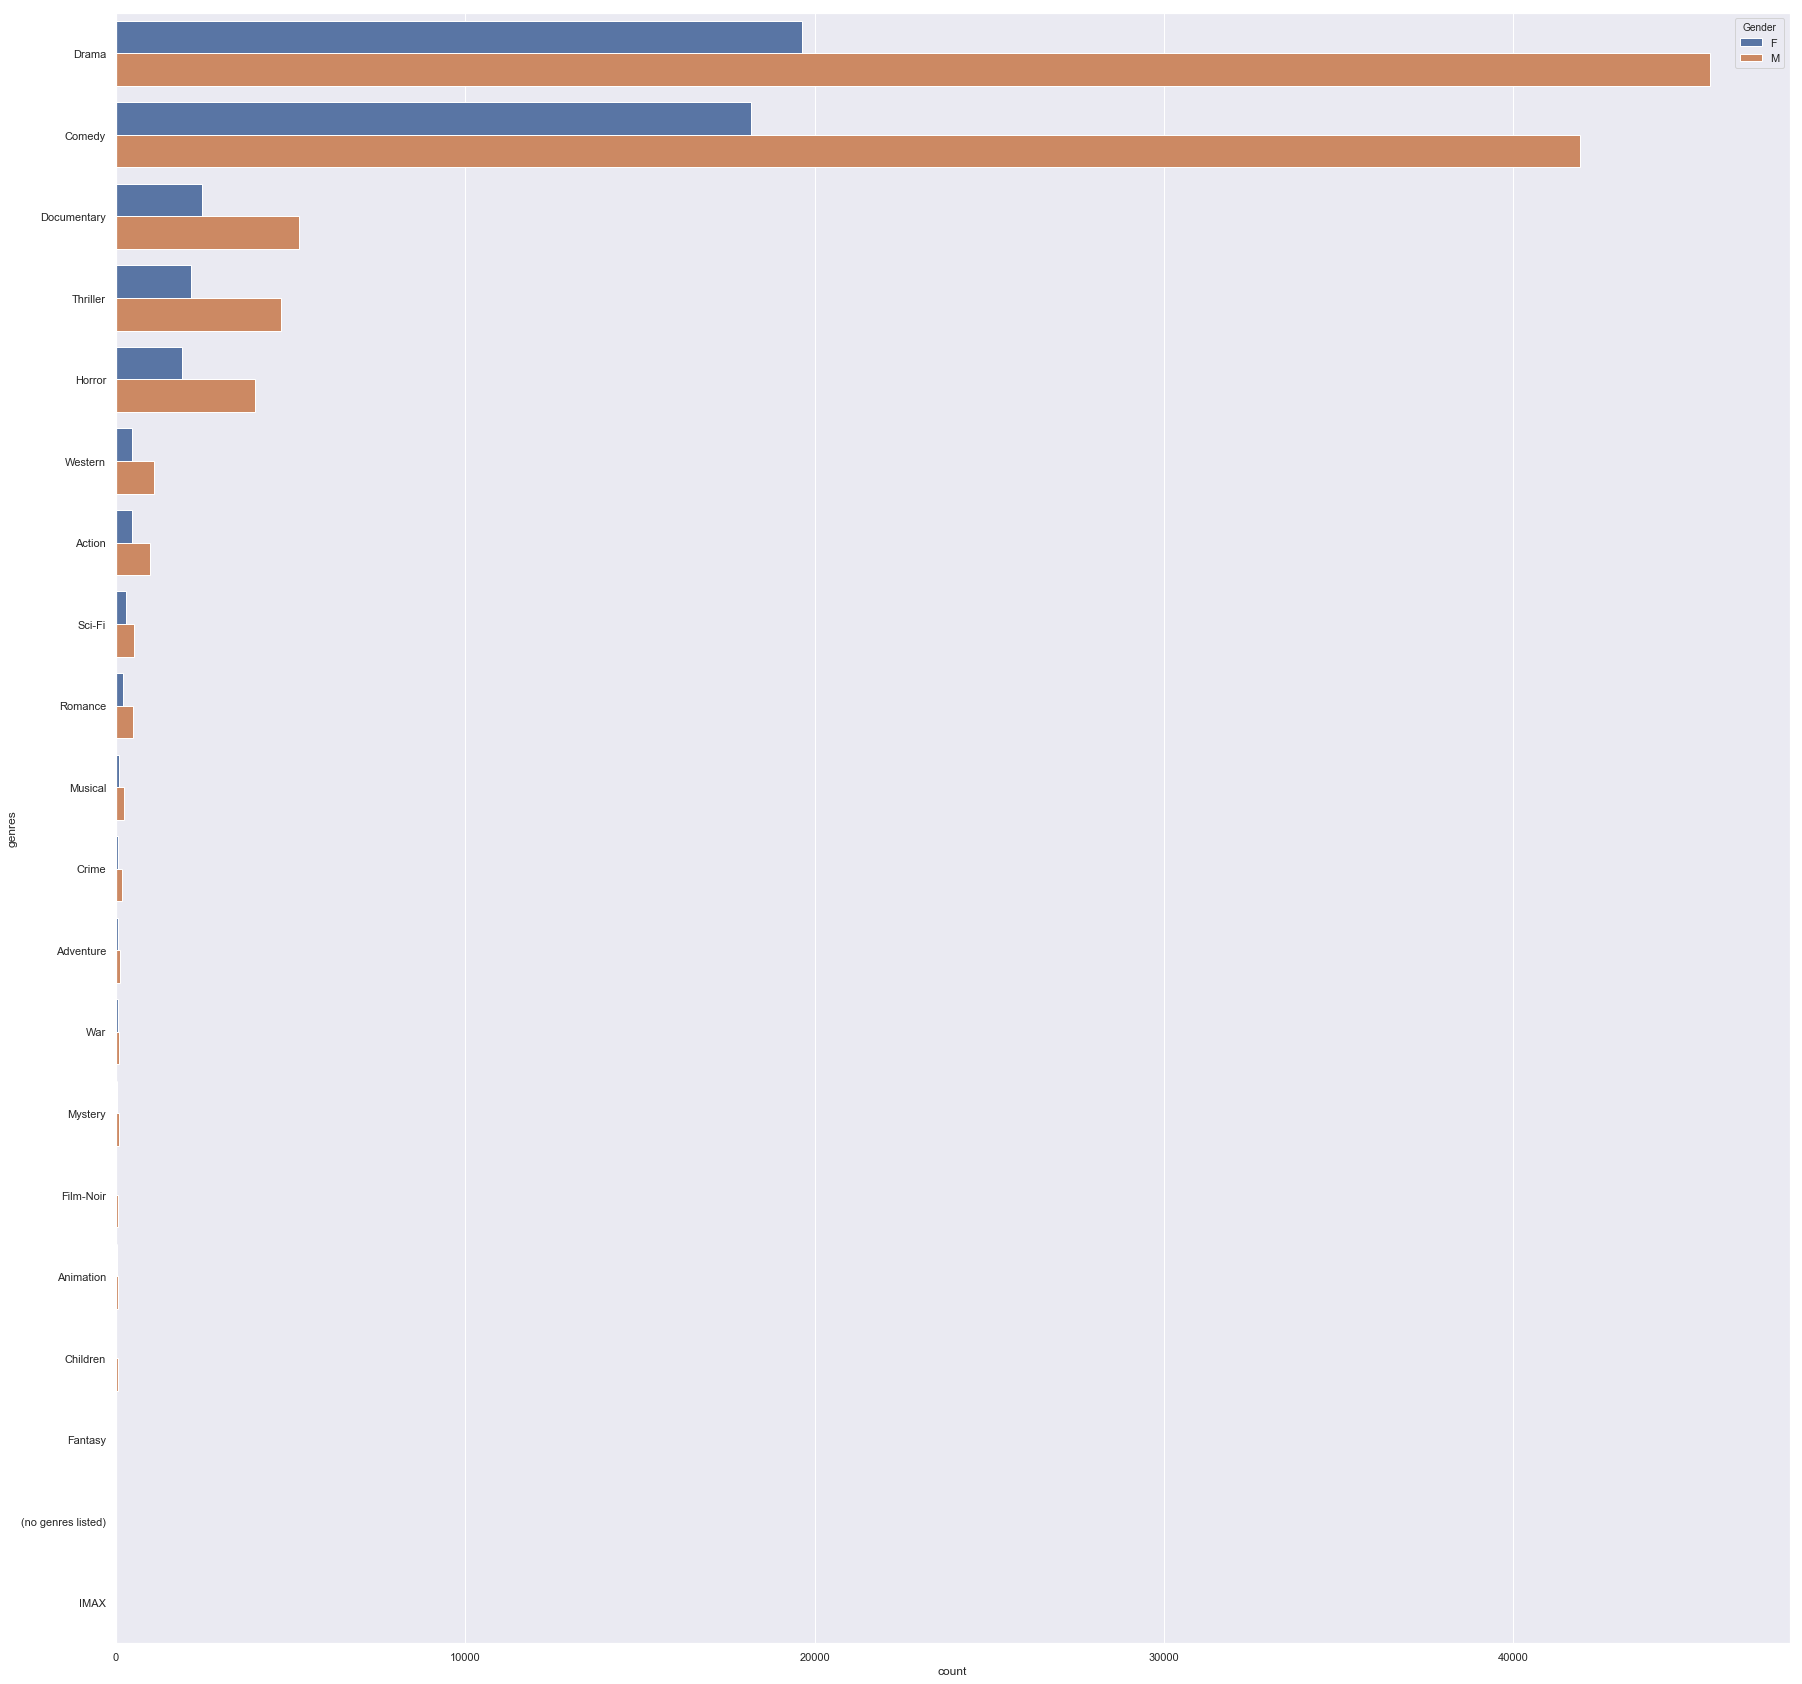

In [26]:
#aantal stemmen per geslecht
display(HTML('<h2>Stem per geslacht per genre</h2>'))
import seaborn as sns
%matplotlib inline
from pyspark.sql.functions import col, size
votes = ratings_m.join(users, ["userId"])
votes = movie.join(votes, ["movieId"], "inner")
votes.createOrReplaceTempView("votes");
votes = sqlContext.sql("select * from votes where genres not like '%|%'") #om het wat korter te maken
sns.set(rc={'figure.figsize':(30,30)})
sns.countplot(y='genres', hue='Gender', data=votes.toPandas(), order = votes.toPandas()['genres'].value_counts().index)

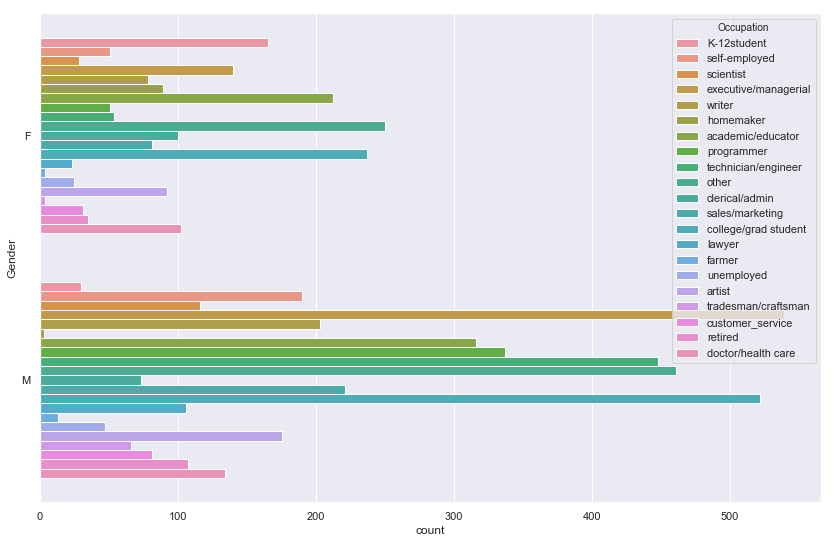

In [78]:
#werk per geslacht
import seaborn as sns
%matplotlib inline
from ipywidgets import widgets
from IPython.display import display
dta = users.toPandas()
#sns.set_context(rc={"figure.figsize": (30, 30)})
plt.figure(figsize=(14,9))
sns.countplot(y='Gender', hue='Occupation', data=dta)

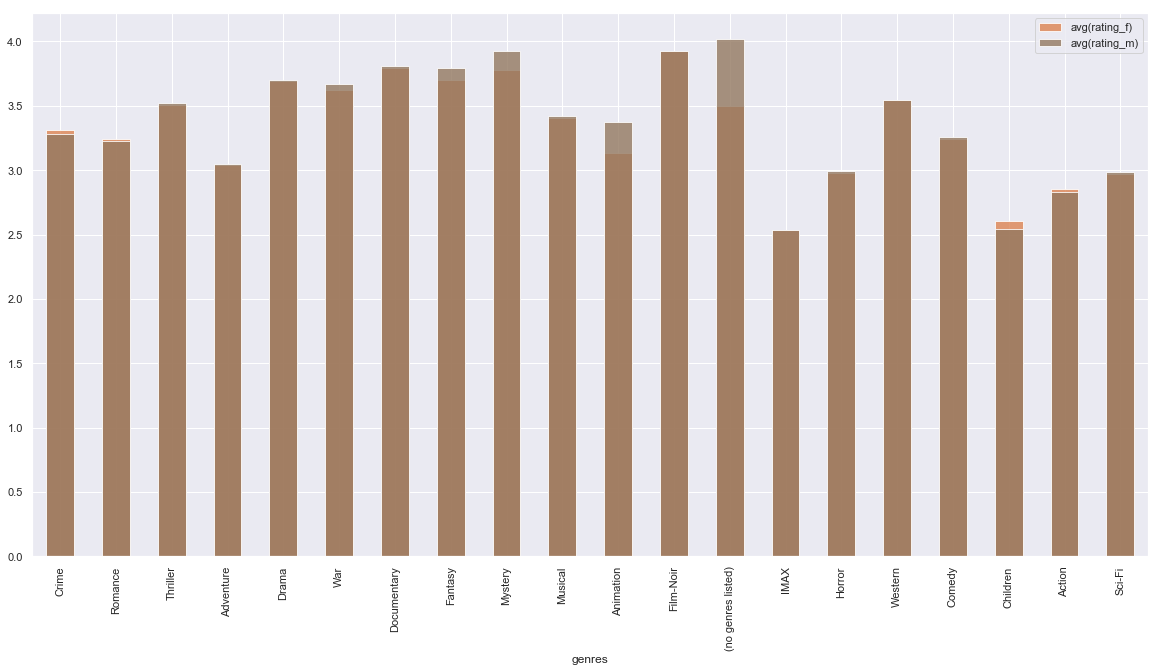

In [28]:
display(HTML('<h2>Gemiddelde per genre, per geslacht</h2>'))
import pandas as pd
ax = plt.gca()
votes = ratings_m.join(users, ["userId"])
avg_moviesRatings = ratings_m.groupby('movieId').mean()
avg_moviesRatings = avg_moviesRatings.drop('avg(movieId)')
avg_movies = votes.join(avg_moviesRatings, ["movieId"])
avg_movies = avg_movies.drop('avg(userId)')
avg_movies = avg_movies.join(movie, ["movieId"])
avg_movies.createOrReplaceTempView("avg_movies");
avg_movies = sqlContext.sql("select * from avg_movies where genres not like '%|%'") #om het wat korter te maken want anders wordt de grafiek te groot
#male rates
avg_movies_male = sqlContext.sql("select * from avg_movies where gender == 'M' ")
avg_movies_male = avg_movies_male.select('genres','avg(rating)')
avg_movies_male = avg_movies_male.withColumnRenamed("avg(rating)", "rating_m")
avg_movies_male = avg_movies_male.groupby('genres').mean()
#f rates
avg_movies_f = sqlContext.sql("select * from avg_movies where gender == 'F' ")
avg_movies_f = avg_movies_f.select('genres','avg(rating)')
avg_movies_f = avg_movies_f.withColumnRenamed("avg(rating)", "rating_f")
avg_movies_f = avg_movies_f.groupby('genres').mean()
avg_movies_both = avg_movies_f.join(avg_movies_male, ["genres"]) #samenzetten op basis van genress
#afronden
avg_movies_both.withColumn("avg(rating_f)", func.round(avg_movies_both["avg(rating_f)"],1))
avg_movies_both.withColumn("avg(rating_m)", func.round(avg_movies_both["avg(rating_m)"],1))
avg_movies_both.createOrReplaceTempView("both");
data = sqlContext.sql("select * from both where genres not like '%|%'") #om het wat korter te maken want anders wordt de grafiek te groot
#graph
avg_movies_pd = data.toPandas()
avg_movies_pd.plot(x="genres", y="avg(rating_f)", kind="bar", ax=ax, color="C1", alpha=0.8,figsize=(20,10))
avg_movies_pd.plot(x="genres", y="avg(rating_m)", kind="bar", ax=ax, color="C5", alpha=0.8,figsize=(20,10))

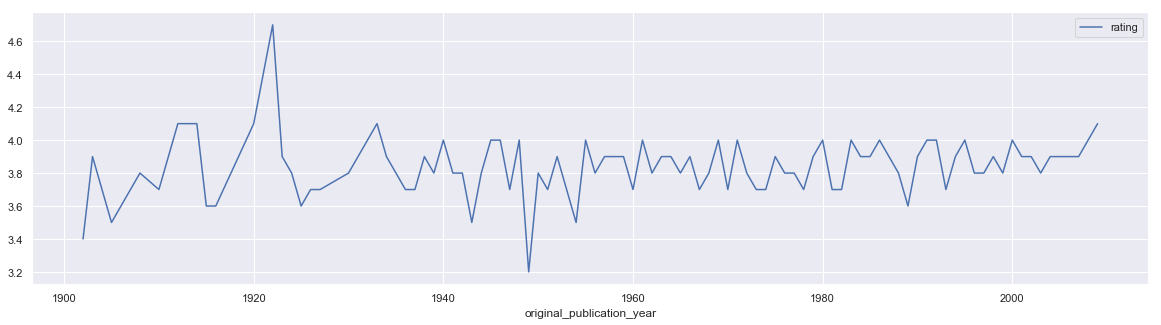

In [29]:
display(HTML('<h1>Verkennen van de boek dataset</h1>'))
display(HTML('<h2>Gemiddelde rating per jaar</h2>'))
bookwithyear = books.select('book_id', 'original_publication_year')
bookwithrating = ratings.select('book_id','rating')
avgratingperbook = bookwithrating.groupBy('book_id').agg({"rating": "mean"})
avgratingperbook = avgratingperbook.withColumnRenamed("avg(rating)", "rating")
ratingperyear = bookwithyear.join(avgratingperbook, bookwithyear.book_id == avgratingperbook.book_id, 'inner').select(bookwithyear.original_publication_year, avgratingperbook.rating)
filtered_df = ratingperyear.filter(ratingperyear.original_publication_year > 1900)
year_rating = filtered_df.groupBy('original_publication_year').agg({"rating": "mean"})
year_rating = year_rating.withColumnRenamed("avg(rating)", "rating")
year_rating = year_rating.withColumn("rating", func.round(year_rating["rating"],1))
sortedyears = year_rating.orderBy(year_rating.original_publication_year.asc())
pdf = sortedyears.toPandas()
pdf.plot(x="original_publication_year", y="rating", figsize=(20,5))
plt.show()

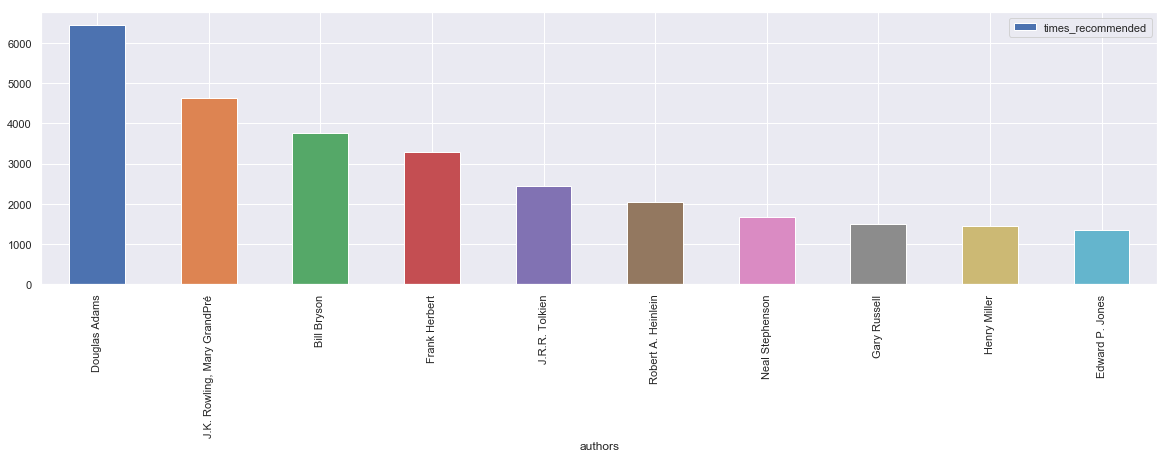

In [31]:
display(HTML('<h2>Meest aangerade auteurs</h2>'))
authorandbook = books.select('book_id', 'authors')
authors_toread = authorandbook.join(to_read, authorandbook.book_id == to_read.book_id, 'inner').select(to_read.book_id, authorandbook.authors)
bestauthors = authors_toread.groupby("authors").count()
bestauthors = bestauthors.withColumnRenamed("count", "times_recommended")
bestauthors = bestauthors.orderBy(bestauthors.times_recommended.desc())
pandasDF = bestauthors.toPandas()
pandasDF[:10].plot(x='authors', y='times_recommended', kind='bar', figsize=(20,5))

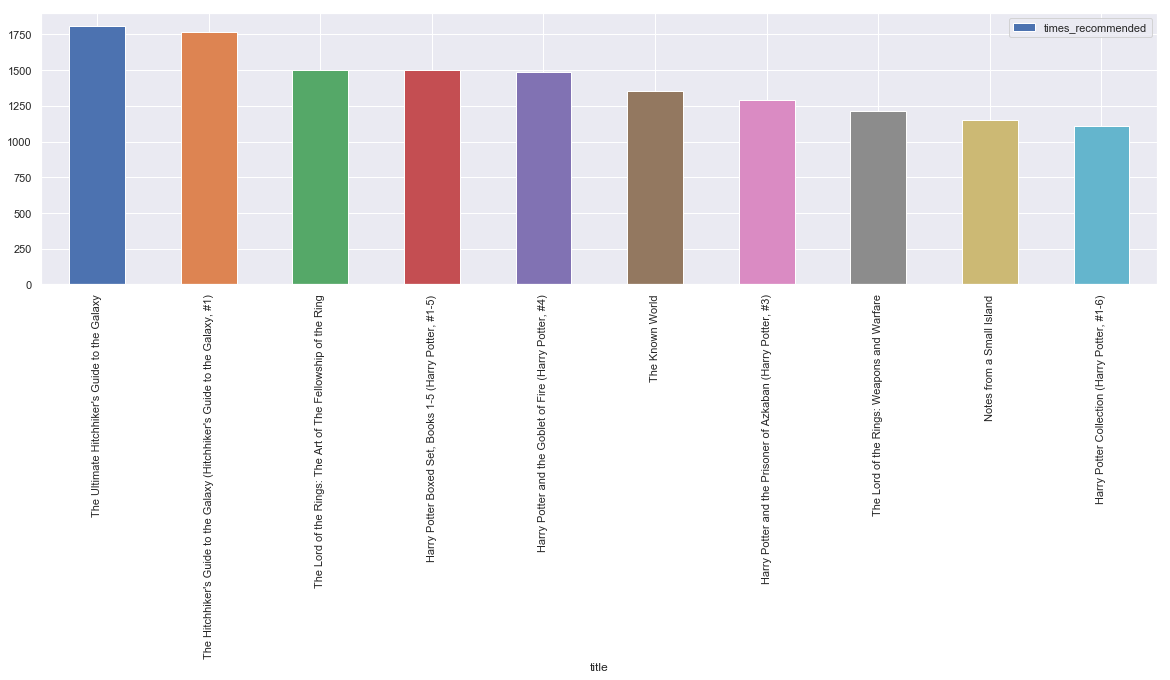

In [32]:
display(HTML('<h2>Meest aangerade boek</h2>'))
mostrecommended = to_read.groupby('book_id').count()
mostrecommended = mostrecommended.withColumnRenamed("count", "times_recommended")
mostrecommended = mostrecommended.orderBy(mostrecommended.times_recommended.desc())
bookswithtitle = books.select('book_id', 'title')
bestbook_toread = mostrecommended.join(bookswithtitle, mostrecommended.book_id == bookswithtitle.book_id, 'inner').select(mostrecommended.times_recommended, bookswithtitle.title)
pandasBook = bestbook_toread.toPandas()
pandasBook[:10].plot(x='title', y='times_recommended', kind='bar', figsize=(20,5))

In [88]:
#vervuiling
tags_b.orderBy(tags_b.tag_name.desc()).show()

+------+-----------------+
|tag_id|         tag_name|
+------+-----------------+
| 34251|       ｆａｖｏｕｒｉｔｅｓ|
| 34250|           ＳＥＲＩＥＳ|
| 34249|            Ｍａｎｇａ|
| 34248|        Ｆａｖｏｒｉｔｅｓ|
| 34247|        Ｃhildrens|
| 34246|       ﻳﻮﺳﻒ-زيدان|
| 34245|       ﺭﺿﻮﻯ-عاشور|
| 34244|﹏moonplus-reader﹏|
| 34243|               골든|
| 34242|               漫画|
| 34241|              日本語|
| 34240|             日本文学|
| 34239|               日本|
| 34238|          小說-奇幻小說|
| 34237|               叶红|
| 34236|               中文|
| 34235|        ℱａｖｏｒｉｔｅｓ|
| 34234|         วรรณว-ภา|
| 34233|                ۱|
| 34232|          کودکانه|
+------+-----------------+
only showing top 20 rows



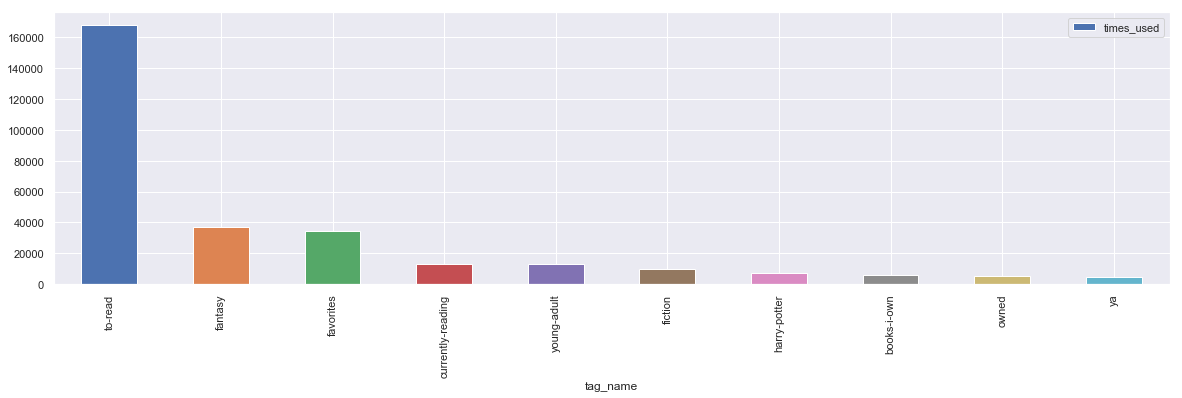

In [33]:
display(HTML('<h2>Meest gebruikte boektag</h2>'))
tagwithcount = book_tags.select('tag_id', 'count')
tagwithcount = tagwithcount.withColumnRenamed("count", "times_used")
mostused_tag = tagwithcount.join(tags_b, tagwithcount.tag_id == tags_b.tag_id, 'inner').select(tagwithcount.times_used, tags_b.tag_name)
pandasTags = mostused_tag.toPandas()
pandasTags[:10].plot(x='tag_name', y='times_used', kind='bar', figsize=(20,5))

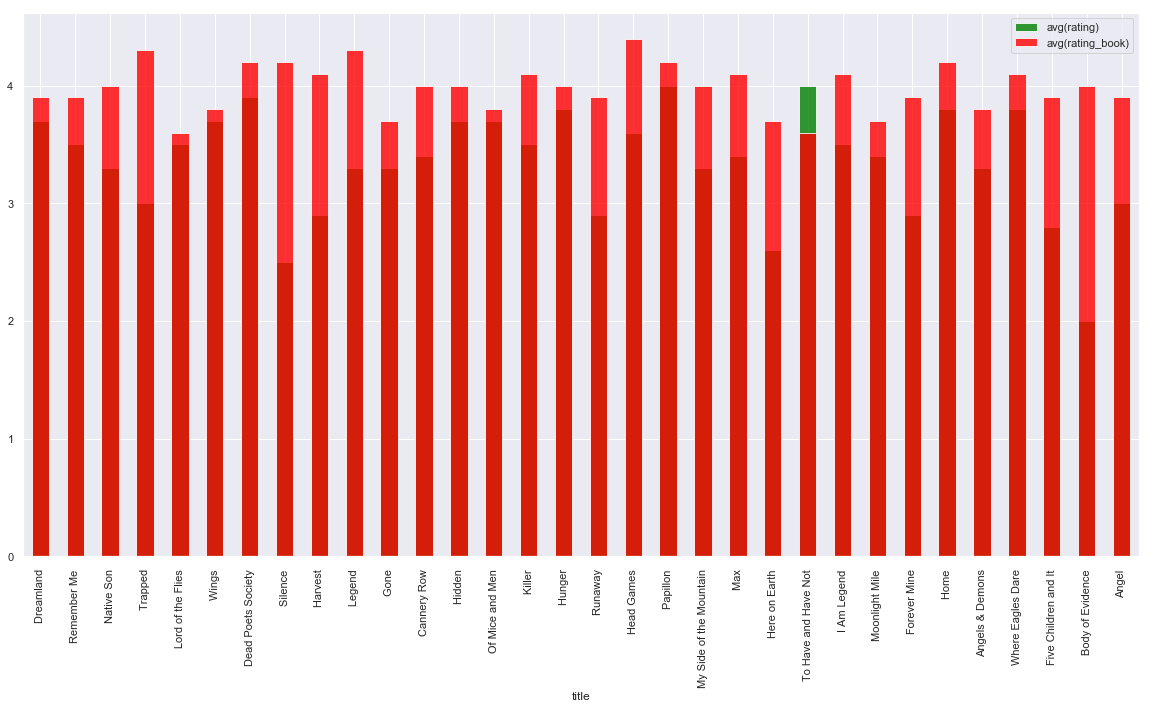

In [67]:
moviesTitles = movie.drop('genres')
moviesRatings = ratings_m.drop('userId')
moviesRatings = moviesRatings.drop('timestamp')
avg_moviesRatings = moviesRatings.groupby('movieId').mean()
avg_moviesRatings = moviesRatings.drop('avg(movieId)')
#avg_moviesRatings = avg_moviesRatings.withColumnRenamed("rating", "rating_movie")
avg_movies = moviesTitles.join(avg_moviesRatings, on='movieId', how='inner')

avg_movies = avg_movies.drop('movieId')
booksTitles = books.drop('book_id')
avg_movies_split = pyspark.sql.functions.split(avg_movies['title'], '\\(')
testSP = avg_movies
testSP = testSP.withColumn('title', avg_movies_split.getItem(0))
testBook = boksTitles.selectExpr("original_title as title", "average_rating as rating_book")
compare = testSP.join(testBook, ["title"])
compare = compare.groupBy("title").agg({"rating": "avg", "rating_book": "avg"})
compare = compare.withColumn("avg(rating)", func.round(compare["avg(rating)"],1))
compare = compare.withColumn("avg(rating_book)", func.round(compare["avg(rating_book)"],1))
#compare.show()
#graph
ax = plt.gca()
compare.toPandas()[:100].plot(x="title", y="avg(rating)", kind="bar", ax=ax, color="Green", alpha=0.8,figsize=(20,10))
compare.toPandas()[:100].plot(x="title", y="avg(rating_book)", kind="bar", ax=ax, color="Red", alpha=0.8,figsize=(20,10))
plt.show()

In [83]:
testSP.sort('rating').show(10)

+--------------------+------+
|               title|rating|
+--------------------+------+
|  Muppet Movie, The |   0.5|
|Day After Tomorro...|   0.5|
|Starship Troopers...|   0.5|
|  Nemesis 2: Nebula |   0.5|
|            Stealth |   0.5|
|            Sleeper |   0.5|
|         Aquamarine |   0.5|
|Halloween H20: 20...|   0.5|
|            Slither |   0.5|
|Race to Witch Mou...|   0.5|
|       First Knight |   0.5|
|    Licence to Kill |   0.5|
|   Schindler's List |   0.5|
|Friday the 13th P...|   0.5|
|To Kill a Mocking...|   0.5|
|        Hero Wanted |   0.5|
|              Alien |   0.5|
|War of the Worlds...|   0.5|
|Jay and Silent Bo...|   0.5|
|            Mammoth |   0.5|
+--------------------+------+
only showing top 20 rows



In [86]:
testBook.sort('rating_book').show(10)

+--------------------+--------------------+
|               title|         rating_book|
+--------------------+--------------------+
|"My Story: ""A Ch...|"My Story: ""A Ch...|
|One Night @ The C...|                2.47|
|     The Almost Moon|                2.67|
|The Finkler Question|                2.76|
|        Four Blondes|                 2.8|
|                Lost|                 2.8|
|            Tell-All|                2.84|
|Revenge Wears Pra...|                2.84|
|Parmi les dix mil...|                2.84|
|The Emperor's Chi...|                2.93|
+--------------------+--------------------+
only showing top 10 rows

